#                       Data preprocessing

In [5]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [11]:
#Install EMNIST library, import datasets of letters, Matplotlib

from emnist import list_datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from emnist import extract_training_samples
from emnist import extract_test_samples
test_images, test_labels = extract_test_samples("bymerge")
images, labels = extract_training_samples("bymerge")
# images.shape #(697932, 28, 28)
# test_images.shape #(116323, 28, 28)


In [12]:
# #Let's print first letters from EMNIST training samples
# sample_letter = images[0]
# sample_letter_resize = sample_letter.reshape(28, 28)
# plt.imshow(sample_letter_resize, cmap = 'binary')
# plt.axis("off")
# plt.show()
# #Let's print first 10 letters from EMINST training samples
# for i in range(10,20):
#     first_ten_letters = images[i].reshape((28, 28))
#     plt.imshow(first_ten_letters, cmap = 'binary')
#     #plt.axis("off")
#     plt.show()


Training data shape:  (558345, 28, 28)
Test data shape (139587, 28, 28)
y_train.shape = (558345,)
(558345, 784)
(558345,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 62)                18662     
                                                                 
Total params: 254,162
Trainable params: 254,162
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
15704/15704 [==============================] - 62s 4ms/step - loss: 0.5349 - accuracy: 0.8290 - val_loss: 0.4276 - val_accuracy: 0.8532
Epoch 2/20
15704/15704 [==============================] - 60s 4ms/step - loss: 0.3960 - accuracy: 0.8648 - val_loss: 0.3958 - val_accuracy: 0.8673
Epoch 3/20
15704/15704 [======

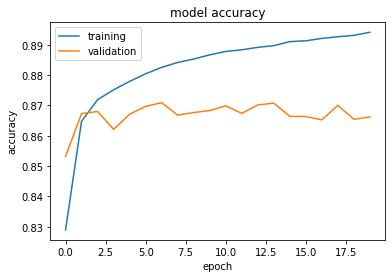

Test loss: 0.476


In [13]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
my_data = images
my_label = labels
x_train, x_test,y_train, y_test = train_test_split(my_data,my_label,test_size = 0.2, random_state = 365)
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("y_train.shape =",y_train.shape)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

image_size = 28*28 # 28*28
num_classes = 47 # ten unique digits

print(x_train.shape)
print(y_train.shape)

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units= 300, activation='relu', input_shape=(image_size,)))
# model.add(Dense(units = 256, activation="softplus"))
# model.add(Dense(units = 256, activation="elu"))
model.add(Dense(units=62, activation='softmax'))

model.summary()

# x_train = x_train.reshape(x_train.shape[0], image_vector_size)
# x_test = x_test.reshape(x_test.shape[0], image_vector_size)


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=True, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')

In [14]:
import pickle
with open('test_data.pickle','wb') as file:
    pickle.dump(my_data, file)

In [15]:
with open('test_label.pickle','wb') as file:
    pickle.dump(my_label, file)

In [ ]:
#starting time: 9h15pm
#ending time: 12h25pm